### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

 ## 1.1. Understand the coupons data and check the entries of data.

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## 2. Investigate the dataset for missing or problematic data.

### Steps followed for identifying the missing and problematic data  
####
 <li> Understanding the shape of the dataset using the shape method </li>
 <li> Finding the columns with null values and the count of nulls values in the column </li>
 <li> Understanding the unique values of each column to replace/fill/drop the nan data </li>
 <li> Checking for any quotes or problematic data , more conditions can be  added if needed
 

In [4]:
print("######################################")
# Checking for the number of records in the dataset
num_records = data.shape[0] - 1  # Subtract 1 to exclude the header

print("Number of records:", num_records)
print("Number of Columns:", data.shape[1])
print()

# Check for null values
null_counts = data.isnull().sum()
has_null_values = null_counts > 0

# Display only the columns with null values
print("######################################")
print("Columns with null values:")
print(null_counts[has_null_values])
print()

print("######################################")
print("Printing the unique values and its value counts of unique values")
print()

# Displaying the unique values and trying to understand the unique values of it 
columns_with_null_values = null_counts[has_null_values].index

for column_name in columns_with_null_values:
    unique_values = data[column_name].unique()
    print("Unique values in", column_name, "column:")
    print(unique_values)
    value_counts = data[column_name].value_counts(dropna=False)
    print("Count of each unique value in", column_name, "column:")
    print(value_counts)
    print()
    
# Check for issues in for any quotes data
for column in data.columns:
    for index, value in data[column].items():
        if isinstance(value, str) and ("'" in value or '"' in value):
            print(f"Quote issue in column '{column}', row {index}: {value}")
        # Add additional checks for other issues if needed

######################################
Number of records: 12683
Number of Columns: 26

######################################
Columns with null values:
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

######################################
Printing the unique values and its value counts of unique values

Unique values in car column:
[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']
Count of each unique value in car column:
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: car, dtype: int64

Unique values in Bar column:
['never' 'les

## 3. Decide what to do about your missing data -- drop, replace, other...

###  Steps taken to clean up the data

There are missing values in six columns of the dataset. 

####

<li> The 'car' column has a high percentage (99%) of missing data, so it is dropped from the dataframe, and the resulting cleaned data is stored in the 'data_clean' dataframe. </li>
<li> Initially, I considered filling the NaN values in the remaining columns using forward fill (ffill) or backward fill (bfill). However, since the column data depends on various factors, the filled values may not be appropriate. </li>
<li> Since none of the columns are numeric, using interpolation is not a viable option. </li>
<li> As I am unable to fill, replace, or interpolate the NaN values, and the combined percentage of NaN rows is approximately 4.7% of the total dataset, those rows are dropped, and the cleaned data is stored in the 'data_cleaned' dataframe. </li>

In [5]:
# Dropping the car column as it has more than 90% of missing data in the column
data_clean= data.drop("car", axis=1)

# Check for null values
null_counts_clean = data_clean.isnull().sum()
has_null_values_clean = null_counts > 0

# Display only the columns with null values
print("######################################")
print("Columns with null values fater deleting the column 'car':")
print(null_counts_clean[has_null_values_clean])
print()

print("Data clean after dropping the car column" ,data_clean.shape)

# Drop rows with any NaN values
data_cleaned = data_clean.dropna(how='any')

print("Data clean after dropping the NA rows and car column "  ,data_cleaned.shape)
null_counts_clean = data_cleaned.isnull().sum()


######################################
Columns with null values fater deleting the column 'car':
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
dtype: int64

Data clean after dropping the car column (12684, 25)
Data clean after dropping the NA rows and car column  (12079, 25)


### 4. What proportion of the total observations chose to accept the coupon? 

1. Get the total number of observations in dataset using len
2. Get the total observations ready to accept the coupon
3. Calculated the percentage of observations chose to accept the coupon

In [6]:
print("######################################")
print()
# Getting total observations
total_observations = len(data_cleaned)
print("The total observations in the dataset: ", total_observations)

# Getting accepted observations where Y==1
accepted_observations = data_cleaned.query('Y == 1').shape[0]
print("The observations agreed to accept the coupon in the dataset: ", accepted_observations)

proportion = accepted_observations / total_observations

print(f"The proportion of total observations that chose to accept the coupon: {proportion:.2%}")


######################################

The total observations in the dataset:  12079
The observations agreed to accept the coupon in the dataset:  6877
The proportion of total observations that chose to accept the coupon: 56.93%


### 5. Use a bar plot to visualize the `coupon` column.

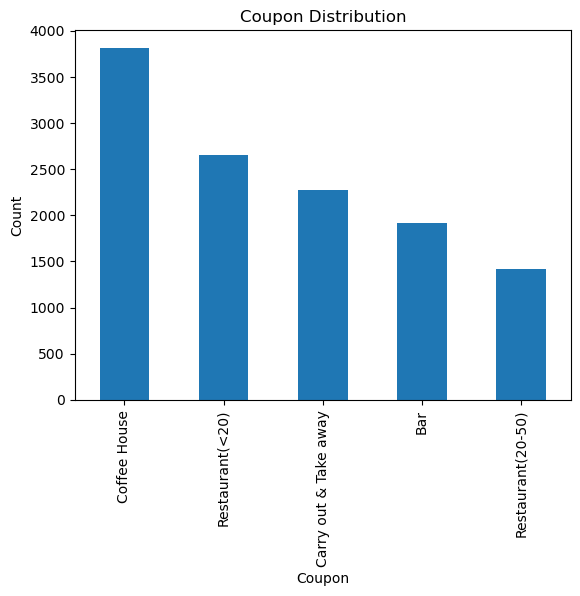

In [7]:
data_cleaned['coupon'].value_counts().plot.bar()

# Customize the plot
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Coupon Distribution')

# Display the plot
plt.show()

### 6. Use a histogram to visualize the temperature column.

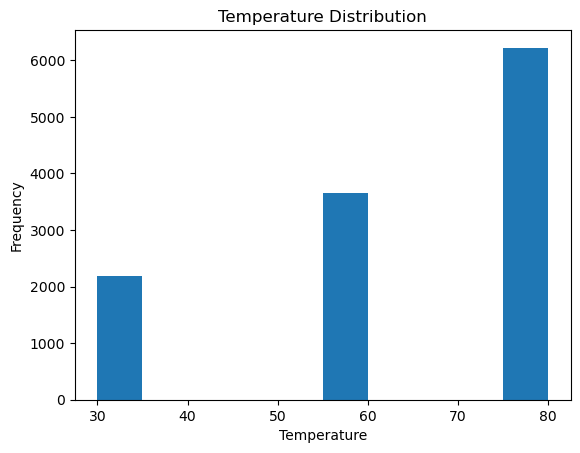

In [8]:
data_cleaned['temperature'].plot.hist()

# Customize the plot
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')

# Display the plot
plt.show()

### 7. Understanding the correlation between the variables

####

<li> Upon analyzing the correlation matrix, it was observed that the column "toCoupon_GEQ5min" had a constant value of '1' for all columns. This led to NaN values in the correlation matrix. Therefore, the correlation matrix was recreated without including the "toCoupon_GEQ5min" column. </li>


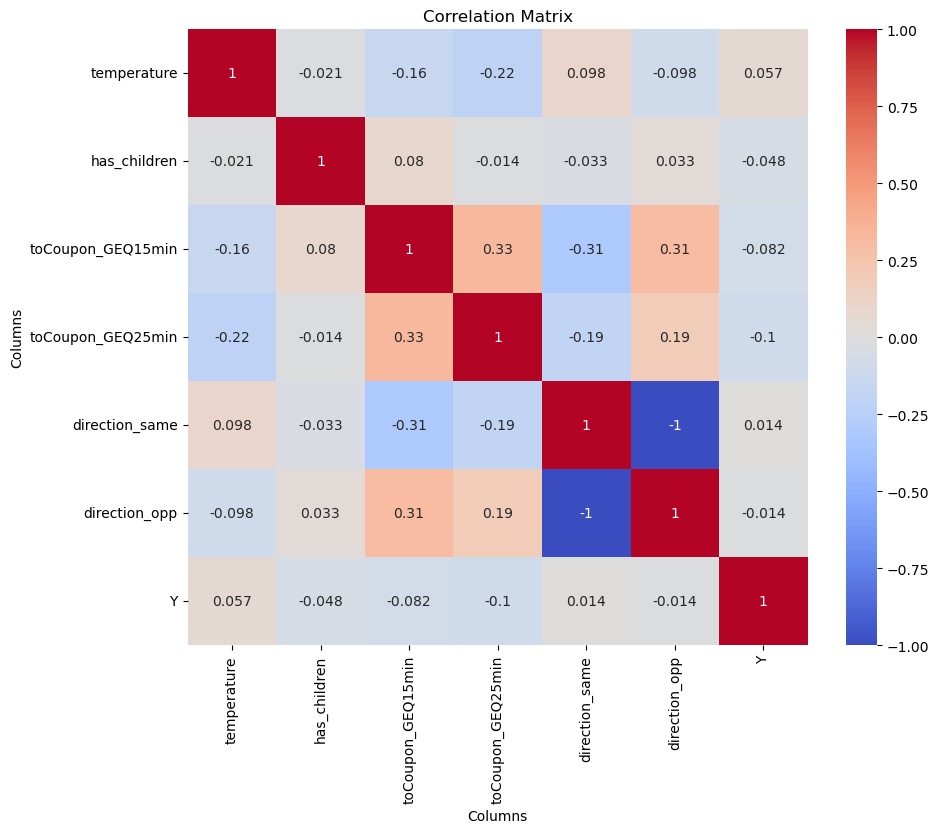

In [9]:
# Assuming 'data_cleaned' is the DataFrame containing the cleaned data
column_to_skip = 'toCoupon_GEQ5min'

# Calculate correlation matrix excluding the specified column
correlation_matrix = data_cleaned.drop(column_to_skip, axis=1).corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set title and labels
plt.title('Correlation Matrix')
plt.xlabel('Columns')
plt.ylabel('Columns')

# Display the plot
plt.show()

 ### **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

#### 1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
# Create a new DataFrame with just the bar coupons
# Note that copy() is used to create a deep copy of the selected rows, ensuring that modifications to df_bar_coupons will not affect the original DataFrame df.

df_bar_coupons = data_cleaned[data_cleaned['coupon'] == 'Bar'].copy()
df_bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


#### 2. What proportion of bar coupons were accepted?

steps followed on the **df_bar_coupons** dataset  

1. Get the total number of bar coupon observations from dataset using len
2. Get the total observations ready to accept the coupon
3. Calculated the percentage of observations chose to accept the coupon

In [11]:
print("######################################")
print()
# Getting total observations
total_bar_observations = len(df_bar_coupons)
print("The total bar coupon observations in the dataset: ", total_bar_observations)

# Getting accepted observations where Y==1
accepted_bar_observations = df_bar_coupons.query('Y == 1').shape[0]
print("The observations agreed to accept the bar coupon in the dataset: ", accepted_bar_observations)

bar_proportion = accepted_bar_observations / total_bar_observations

print(f"The proportion of total bar observations that chose to accept the coupon: {bar_proportion:.2%}")


######################################

The total bar coupon observations in the dataset:  1913
The observations agreed to accept the bar coupon in the dataset:  788
The proportion of total bar observations that chose to accept the coupon: 41.19%


#### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

steps followed on the **df_bar_coupons** dataset  

1. Bar has 'never', 'less1', 1~3, 4~8, gt8 values. 
2. Creating a dataframe with Bar values in 'never', 'less1', '1~3' for df_bar_lessthan_3 visits
3. Creating a dataframe with Bar values in '4~8', 'gt8' for df_bar_morethan_3 visits
4. Calculate the mean of those 2 datasets on the 'Y' column which is the column acceptance


In [12]:
print("######################################")
print()

df_bar_coupons["Bar"].value_counts()
# Bar has 'never', 'less1', 1~3, 4~8, gt8 values. 
df_bar_lessthan_3 = df_bar_coupons[df_bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
df_bar_morethan_3 = df_bar_coupons[df_bar_coupons['Bar'].isin(['4~8', 'gt8'])]


# Calculate acceptance rates for each group
acceptance_rate_few_visits = df_bar_lessthan_3['Y'].mean()
acceptance_rate_more_visits = df_bar_morethan_3['Y'].mean()

# Compare the acceptance rates
print(f"Acceptance rate for individuals with 3 or fewer bar visits: {acceptance_rate_few_visits:.2%}")
print(f"Acceptance rate for individuals with more than 3 bar visits: {acceptance_rate_more_visits:.2%}")
print()
print("######################################")
print()

print("Observed that individuals who visits bar more than 3 times a month are accepting the more coupons")


######################################

Acceptance rate for individuals with 3 or fewer bar visits: 37.27%
Acceptance rate for individuals with more than 3 bar visits: 76.17%

######################################

Observed that individuals who visits bar more than 3 times a month are accepting the more coupons


#### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

steps followed on the **df_bar_coupons** dataset  

1. Age is object and it has categories below21, 21, 26, 31, 36, 41, 46, 50plus.
2. Creating a dataframe with Bar visits more than once and Age > 25
3. Creating a dataframe by excluding the entries present in dataframe created in step 2
4. Calculate the mean of those 2 datasets on the 'Y' column which is the column acceptance


In [13]:
print("######################################")
print()

# Age is object and it has categories below21, 21, 26, 31, 36, 41, 46, 50plus
df_age_gr_25 = df_bar_coupons[~df_bar_coupons['age'].isin(['below21', '21'])]

# Display the filtered DataFrame
#print('Shape of age greater than 25' , df_age_gr_25.shape)

# Calculate the acceptance rate for drivers who go to a bar more than once a month and are over the age of 25
df_accepted_rate_over_25_more_than_once = df_bar_coupons[(df_bar_coupons['Bar'].isin(['1~3','4~8', 'gt8'])) & (df_bar_coupons['age'].isin(['26', '31', '36', '41', '46','50plus']))]
accepted_rate_over_25_more_than_once = df_accepted_rate_over_25_more_than_once["Y"].mean()

# Calculate the acceptance rate for all other drivers
df_accepted_rate_others = df_bar_coupons[~df_bar_coupons.index.isin(df_accepted_rate_over_25_more_than_once.index)].copy()
accepted_rate_others = df_accepted_rate_others["Y"].mean()

# Compare the acceptance rates
print(f"Acceptance rate for individuals with age > 25 and visits bar more than once : {accepted_rate_over_25_more_than_once:.2%}")
print(f"Acceptance rate for individuals of all others: {accepted_rate_others:.2%}")
print()
print("######################################")
print()

print("Observed that individuals with age > 25 and visits bar more than once are accepting the coupons and yes there is a difference")


######################################

Acceptance rate for individuals with age > 25 and visits bar more than once : 68.98%
Acceptance rate for individuals of all others: 33.77%

######################################

Observed that individuals with age > 25 and visits bar more than once are accepting the coupons and yes there is a difference


#### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

steps followed on the **df_bar_coupons** dataset  

1. Created the query conditions for bar, passangers and occuptaion columns and created the dataset using the query
2. Calculated the acceptance rate for the above filtered dataframe
3. Calculated the acceptance rate of the df_bar_coupons dataframe as it as all the entries of the bar


In [14]:
print("######################################")
print()

# Data sets with go to bar more than once a month - 'Bar'.isin(['1~3','4~8', 'gt8'])
# Passengers that were not a kid - 'passanger' not in (['Kid(s)'])
# occupations other than farming, fishing, or forestry.  - occupation not in(['Farming Fishing & Forestry'])

df_bar_coupons['occupation'].value_counts()
filtered_df = df_bar_coupons.query('(Bar in ["1~3", "4~8", "gt8"]) and (passanger not in ["Kids(s)"]) and  occupation not in(["Farming Fishing & Forestry"])')

# Calculate the acceptance rates for each group
acceptance_rate_filtered = filtered_df['Y'].mean()
acceptance_rate_all = df_bar_coupons['Y'].mean()

# Compare the acceptance rates
print(f"Acceptance rate for drivers who go to bars more than once a month "
      f"and had passengers not a kid and occupations other than farming, fishing, or forestry: "
      f"{acceptance_rate_filtered:.2%}")
print(f"Acceptance rate for all drivers: {acceptance_rate_all:.2%}")

print()
print("######################################")
print()


######################################

Acceptance rate for drivers who go to bars more than once a month and had passengers not a kid and occupations other than farming, fishing, or forestry: 68.53%
Acceptance rate for all drivers: 41.19%

######################################



#### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

Approach followed.

1. Created the datasets for each group using the df query
2. Calculated the acceptance rate of all the groups 
3. Did a comparison of all the acceptance rates 

In [15]:

print("######################################")
print()

# Create boolean masks for each group
group1 = df_bar_coupons.query('(Bar in ["1~3", "4~8", "gt8"]) and (passanger not in ["Kids(s)"]) and  maritalStatus not in(["Widowed"])')
group2 = df_bar_coupons.query('(Bar in ["1~3", "4~8", "gt8"]) and (age  in ["Below21", "21" , "26"])')
group3 = df_bar_coupons.query('(Bar in ["4~8", "gt8"]) and (income  in ["Less than $12500", "$12500 - $24999" , "$25000 - $37499", "$37500 - $49999"])')


# Calculate the acceptance rates for each group
acceptance_rate_group1 = group1['Y'].mean()
acceptance_rate_group2 = group2['Y'].mean()
acceptance_rate_group3 = group3['Y'].mean()

# Compare the acceptance rates
print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: "
      f"{acceptance_rate_group1:.2%}")
print(f"Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: "
      f"{acceptance_rate_group2:.2%}")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have income less than 50K: "
      f"{acceptance_rate_group3:.2%}")

    
print()

# Check for differences in acceptance rates
if (acceptance_rate_group1 > acceptance_rate_group2) and (acceptance_rate_group1 > acceptance_rate_group3):
    print("Group 1 -  go to bars more than once a month, had passengers that were not a kid, and were not widowed -has the highest acceptance rate.")
elif (acceptance_rate_group2 > acceptance_rate_group1) and (acceptance_rate_group2 > acceptance_rate_group3):
    print("Group 2 - go to bars more than once a month and are under the age of 30  - has the highest acceptance rate.")
elif (acceptance_rate_group3 > acceptance_rate_group1) and (acceptance_rate_group3 > acceptance_rate_group2):
    print("Group 3 - go to cheap restaurants more than 4 times a month and income is less than 50K -  has the highest acceptance rate.")
else:
    print("There is no significant difference in acceptance rates among the groups.")

    
print()
print("######################################")
print()

######################################

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 68.53%
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 72.96%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have income less than 50K: 78.70%

Group 3 - go to cheap restaurants more than 4 times a month and income is less than 50K -  has the highest acceptance rate.

######################################



#### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Drivers who go to cheap restaurants more than 4 times a month: 
    Drivers who frequently visit cheap restaurants may be more open to accepting bar coupons because they are already budget-conscious and seek value in their dining experiences.They may see the bar coupons as an opportunity to explore new places or enjoy discounted drinks.
    
#### Individuals with more than 3 bar visits: 
    Individuals who frequently visit bars, regardless of other conditions, might have a higher tendency to accept bar coupons. This group likely enjoys the bar scene and is interested in exploring new venues or saving on their preferred social activities.

These hypotheses suggest that drivers who accepted the bar coupons may have specific characteristics such as being cost-conscious, socially active, or interested in exploring new experiences. However, it's important to note that these are just hypotheses based on the provided observations, and further analysis and experimentation would be needed to confirm or validate these hypotheses.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Investigating the Carryout and Takeaway coupons and the characteristics of passengers

#### Creating a dataframe that contains only carryout and takeaway coupons

In [16]:
# Create a new DataFrame with just the carryout and takeaway coupons
# Note that copy() is used to create a deep copy of the selected rows, ensuring that modifications to df_bar_coupons will not affect the original DataFrame df.

df_carryaway_coupons = data_cleaned[data_cleaned['coupon'] == 'Carry out & Take away'].copy()
df_carryaway_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
41,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
55,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12665,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12672,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,1,0,0
12673,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,0
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


#### 2. What proportion of carryout takeaway coupons were accepted?

steps followed on the **df_carryaway_coupons** dataset  

1. Get the total number of bar coupon observations from dataset using len
2. Get the total observations ready to accept the coupon
3. Calculated the percentage of observations chose to accept the coupon

In [17]:
print("######################################")
print()
# Getting total observations
total_carryaway_observations = len(df_carryaway_coupons)
print("The total carryout takeaway coupon observations in the dataset: ", total_carryaway_observations)

# Getting accepted observations where Y==1
accepted_carryaway_observations = df_carryaway_coupons.query('Y == 1').shape[0]
print("The observations agreed to accept the carryout and takeaway coupon in the dataset: ", accepted_carryaway_observations)

carryaway_proportion = accepted_carryaway_observations / total_carryaway_observations

print(f"The proportion of total carryout and takeaway observations that chose to accept the coupon: {carryaway_proportion:.2%}")

print()
print("######################################")
print()

######################################

The total carryout takeaway coupon observations in the dataset:  2280
The observations agreed to accept the carryout and takeaway coupon in the dataset:  1682
The proportion of total carryout and takeaway observations that chose to accept the coupon: 73.77%

######################################



#### 3. Compare the acceptance rate between individuals who have a takeaway frequency of 3 or fewer times a month to those who have a higher frequency.

steps followed on the **df_carryaway_coupons** dataset  

1. CarryAway has 'never', 'less1', 1~3, 4~8, gt8 values. 
2. Creating a dataframe with CarryAway values in 'never', 'less1', '1~3' for df_bar_lessthan_3 visits
3. Creating a dataframe with CarryAway values in '4~8', 'gt8' for df_bar_morethan_3 visits
4. Calculate the mean of those 2 datasets on the 'Y' column which is the column acceptance

In [18]:
print("######################################")
print()

df_carryaway_coupons["CarryAway"].value_counts()
# CarryAway has 'never', 'less1', 1~3, 4~8, gt8 values. 
df_carryaway_lessthan_3 = df_carryaway_coupons[df_carryaway_coupons['CarryAway'].isin(['never', 'less1', '1~3'])]
df_carryaway_morethan_3 = df_carryaway_coupons[df_carryaway_coupons['CarryAway'].isin(['4~8', 'gt8'])]


# Calculate acceptance rates for each group
acceptance_rate_few_visits = df_carryaway_lessthan_3['Y'].mean()
acceptance_rate_more_visits = df_carryaway_morethan_3['Y'].mean()

# Compare the acceptance rates
print(f"Acceptance rate for individuals with 3 or fewer CarryAways: {acceptance_rate_few_visits:.2%}")
print(f"Acceptance rate for individuals with more than 3 CarryAways: {acceptance_rate_more_visits:.2%}")
print()
print("######################################")
print()

print("Observed that individuals who took carryaways more than 3 times a month are accepting more coupons")

######################################

Acceptance rate for individuals with 3 or fewer CarryAways: 72.36%
Acceptance rate for individuals with more than 3 CarryAways: 75.35%

######################################

Observed that individuals who took carryaways more than 3 times a month are accepting more coupons


#### 4. Generate a  plot to examine the relationship between coupon acceptance, occupation and  income range.


**Approach Taken:**

1. Utilized the 'groupby' function along with 'query' to filter and group the data, aiming to explore the relationship between income and coupon acceptance.
2. Employed a similar methodology to investigate the relationship between occupation and coupon acceptance.  

**Key Findings: ** 

1. A notable observation is that as income increases, there appears to be a decrease in coupon acceptance behavior.
2. The majority of accepted coupons are associated with individuals in categories such as Unemployed, Students, and those working in the Computer & Mathematical field.
3. Furthermore, an analysis was conducted on the occupation of drivers traveling in the same direction. It was discovered that coupon acceptance does not depend on the driver traveling in the same direction.
4. These findings shed light on the relationship between income, occupation, and coupon acceptance, providing valuable insights into the factors that influence drivers' willingness to accept coupons.

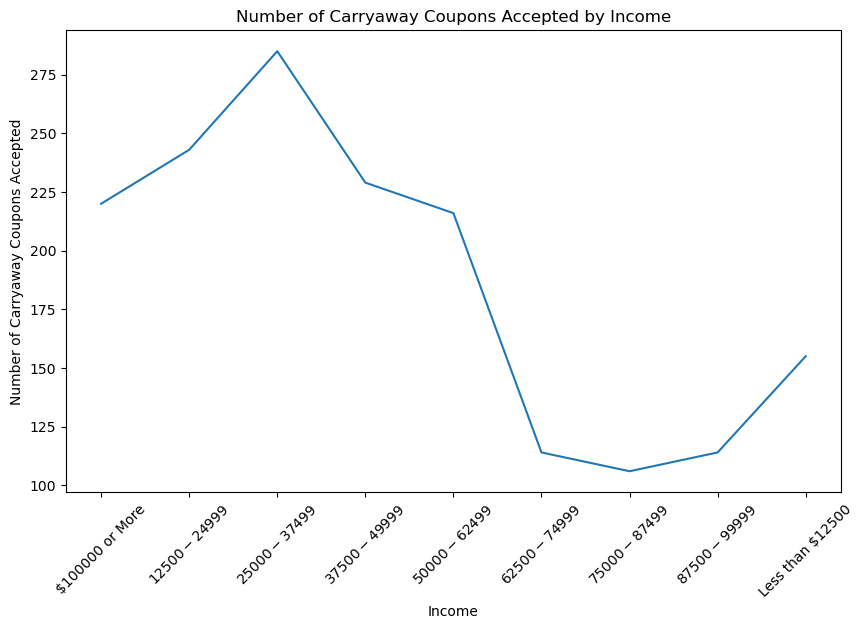

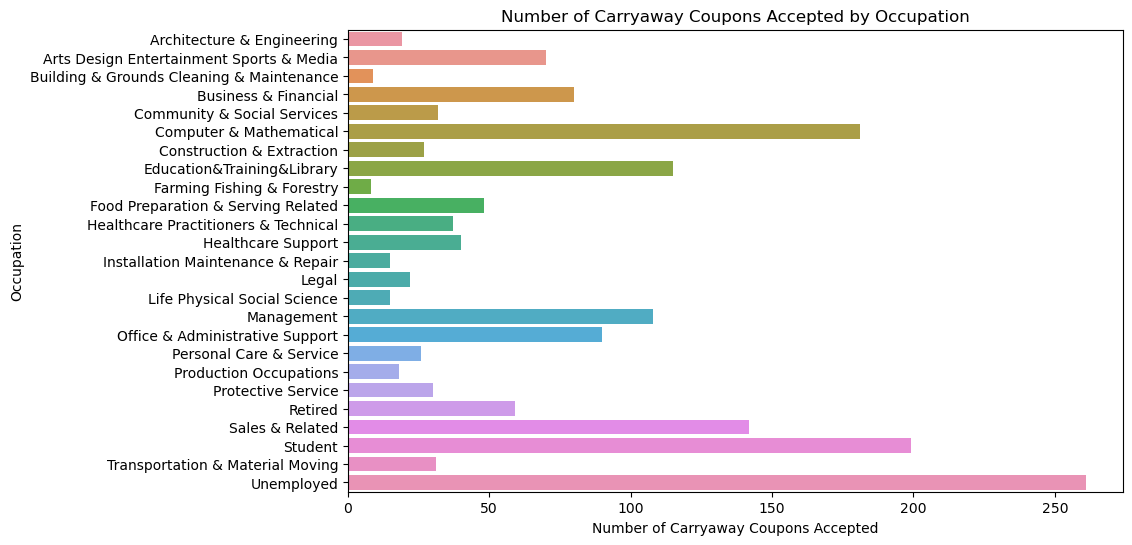

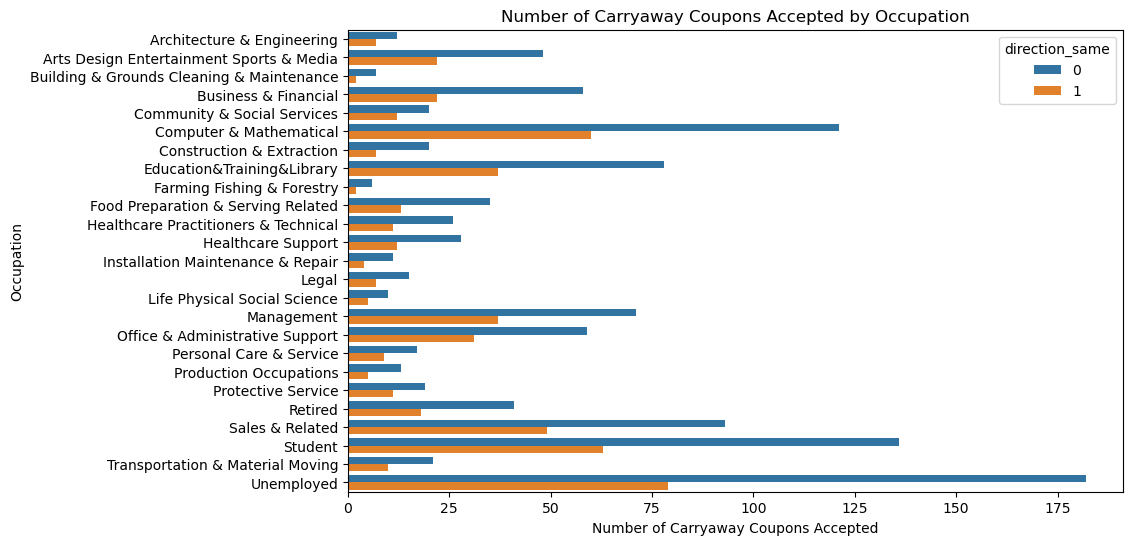

In [19]:
# Using the groupby 'income' and filtering the acceptance with 1 to create the dataframe for income
df_carrayaway_income = df_carryaway_coupons.query('Y == 1').groupby('income')['Y'].sum().reset_index()

# Using the groupby 'occupation' and filtering the acceptance with 1 to create the dataframe for income
df_carrayaway_occup = df_carryaway_coupons.query('Y == 1').groupby(['occupation'])['Y'].sum().reset_index()

#print(df_carrayaway_occup)
# plot to show Number of Carryaway Coupons Accepted by Income

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_carrayaway_income, x='income', y='Y')
plt.xlabel('Income')
plt.ylabel('Number of Carryaway Coupons Accepted')
plt.title('Number of Carryaway Coupons Accepted by Income')
plt.xticks(rotation=45)
plt.show()

# Plot to show Number of Carryaway Coupons Accepted by Occupation

plt.figure(figsize=(10, 6))
sns.barplot(data=df_carrayaway_occup, y='occupation', x='Y')
plt.ylabel('Occupation')
plt.xlabel('Number of Carryaway Coupons Accepted')
plt.title('Number of Carryaway Coupons Accepted by Occupation')
plt.show()

# Plot to show Number of Carryaway Coupons Accepted by Occupation and also based on direction

df_carrayaway_occup = df_carryaway_coupons.query('Y == 1').groupby(['occupation','direction_same'])['Y'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_carrayaway_occup, y='occupation', x='Y', hue='direction_same')
plt.ylabel('Occupation')
plt.xlabel('Number of Carryaway Coupons Accepted')
plt.title('Number of Carryaway Coupons Accepted by Occupation')
plt.show()

#### 5. Examining the acceptance of carryaway coupons, by comparing the data based on both destination and marital status, specifically focusing on individuals who have a frequency of carryaway orders exceeding four per month.

steps followed on the **df_carryaway_coupons** dataset  

**Approach Taken: **

1. Utilized the 'groupby' function along with 'query' to filter and group the data, aiming to explore the relationship between destination, martial status and coupon acceptance.

**Key Findings: ** 

1. The majority of individuals who are single or in a married partnership tend to have a higher frequency of takeaways, and their destinations are typically categorized as non-urgent places.

######################################



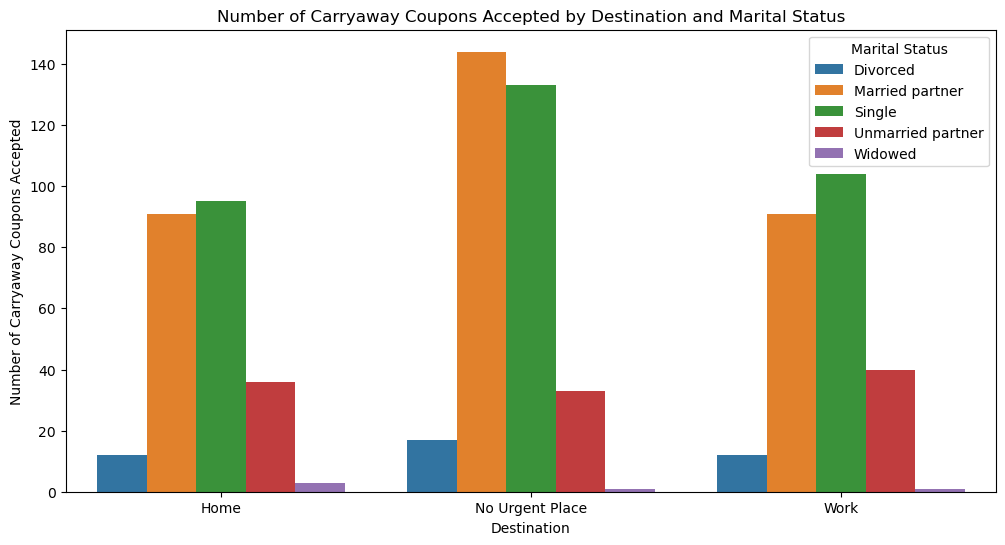

In [20]:
print("######################################")
print()

df_carryaway_coupons["CarryAway"].value_counts()

# CarryAway has 'never', 'less1', 1~3, 4~8, gt8 values. 

# Filtered the rows with carryAway greater than 3  
filtered_df_carrayaway = df_carryaway_coupons.query('(CarryAway in ["4~8","gt8"])')

# Grouped the data based on destination and martial status for coupon accepted rows
df_carrayaway_income = filtered_df_carrayaway.query('Y == 1').groupby(['destination','maritalStatus'])['Y'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_carrayaway_income, x='destination', y='Y', hue='maritalStatus')
plt.xlabel('Destination')
plt.ylabel('Number of Carryaway Coupons Accepted')
plt.title('Number of Carryaway Coupons Accepted by Destination and Marital Status')
plt.legend(title='Marital Status')
plt.show()


 #### 6.  Based on these observations, what do you hypothesize about drivers who accepted the carrayaway coupons?

Based on the provided observations, we can hypothesize the following about drivers who accepted the carryaway coupons:

1. Drivers who are single or in a married partnership and have a higher frequency of takeaways may be more likely to accept carryaway coupons due to their convenience and preference for dining out.

2. The inverse relationship between income and coupon acceptance suggests that drivers with higher incomes may be less motivated to use coupons as they have more financial resources available for dining options.

3. The prevalence of accepted coupons among individuals in categories such as Unemployed, Students, and those working in the Computer & Mathematical field indicates that these groups may be more open to utilizing coupons to save on their dining expenses.

4. The finding that coupon acceptance is not influenced by drivers traveling in the same direction suggests that the decision to accept coupons is independent of the specific route or destination of the driver.

In summary, drivers who accepted carryaway coupons may exhibit a higher frequency of takeaways, belong to certain occupational categories, and have lower income levels. However, further research and analysis are required to validate these hypotheses and gain a deeper understanding of the drivers' behaviors and motivations in accepting carryaway coupons.

